***ALD Random Forest***
**Anthony DiBenedetto**

This program uses a random forest to comapre the accuracy of the model vs the amount of data used to create the model. I perform this in 4 different ways:
- Remove the middle middle channel of 40 dimensions
- Remove every other column
- Separate the 120 columns into the 3 channels and remove 1 column from the channels
- Remove the last element from the 120 columns

After each of these tests there is a graph or confusion matrix to help visualise the results.


In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the training and test data
training_data = (np.load('ALD_Classification_dataset/training_data.npy'))
training_labels = (np.load('ALD_Classification_dataset/training_labels.npy'))

testing_data = (np.load('ALD_Classification_dataset/testing_data.npy'))
testing_labels = (np.load('ALD_Classification_dataset/testing_labels.npy'))

In [6]:
pd.DataFrame(testing_labels)

,0
0,1
1,0
2,1
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [4]:
pd.DataFrame(testing_labels).head()

,0
0,1
1,0
2,1
3,0
4,0


In [5]:
X_train = training_data
y_train = training_labels

X_test = testing_data
y_test = testing_labels

**Remove middle channel of 40 dimensions**

In [6]:
X_train_0 = X_train 
y_train_0 = y_train

X_test_0 = X_test
y_test_0 = y_test

# Remove middle 40 columns

X_train_0 = np.delete(X_train_0, np.s_[40:80], axis=1)
X_test_0 = np.delete(X_test_0, np.s_[40:80], axis=1)

rfc = RandomForestClassifier(n_estimators=250, max_depth=25, max_features='sqrt', class_weight= "balanced" , random_state=42)
rfc.fit(X_train_0, y_train_0)

y_pred = rfc.predict(X_test_0)

In [7]:
# Generate the accuracy from the predicted y values (y_pred) and y_test 
accuracy = accuracy_score(y_test_0, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Generate the confusion matrix from predicted y values (y_pred) and y_test 
cm = confusion_matrix(y_test_0, y_pred)
print("Confusion matrix:\n", cm)

Accuracy: 98.80%
Confusion matrix:
 [[612   7]
 [  5 376]]


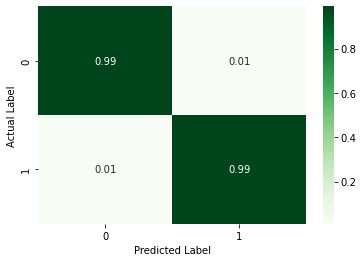

In [8]:
# Use seaborn package to make the confusion matrix look nice, as well as normilize the confusion matrix
import seaborn as sns
cm_normalized = np.round(cm/np.sum(cm, axis=1).reshape(-1, 1), 2) 
sns.heatmap(cm_normalized, cmap="Greens", annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

**Remove every other column**

In [9]:
X_train_1 = X_train 
y_train_1 = y_train

X_test_1 = X_test
y_test_1 = y_test

# Every Other Column Removal
accuracy_list = []
columns = []

all_data = {}

for i in range(8):
    
    rfc = RandomForestClassifier(n_estimators=250, max_depth=25, max_features='sqrt', class_weight= "balanced" , random_state=42)
    rfc.fit(X_train_1, y_train_1)

    y_pred = rfc.predict(X_test_1)
    accuracy = accuracy_score(y_test_1, y_pred)
    accuracy_list.append(accuracy)   

    columns.append(X_train_1.shape[1])
    print("Accuracy: " + str(accuracy) + " | Number of Columns: " + str(X_train_1.shape[1]))
    all_data[X_train_1.shape[1]] = [X_train_1, X_test_1]

    X_train_1 = pd.DataFrame(X_train_1).iloc[:, ::2] 

    X_test_1 = pd.DataFrame(X_test_1).iloc[:, ::2]

    X_train_1 = X_train_1.values

    X_test_1 = X_test_1.values




Accuracy: 0.99 | Number of Columns: 120
Accuracy: 0.986 | Number of Columns: 60
Accuracy: 0.987 | Number of Columns: 30
Accuracy: 0.988 | Number of Columns: 15
Accuracy: 0.987 | Number of Columns: 8
Accuracy: 0.988 | Number of Columns: 4
Accuracy: 0.969 | Number of Columns: 2
Accuracy: 0.759 | Number of Columns: 1


In [10]:
# Since 2 columns was still a pretty high accuacy lets look at the Train and Test data

# Train data
pd.DataFrame(all_data[2][0]).head()

,0,1
0,0.356059,0.336917
1,0.788309,0.008476
2,0.281496,0.290075
3,0.201490,0.232997
4,0.462808,0.248565


In [11]:
# Test data
pd.DataFrame(all_data[2][1]).head()

,0,1
0,0.239797,0.263403
1,0.305793,0.339097
2,0.385707,0.139171
3,0.974438,0.015819
4,0.297728,0.283998


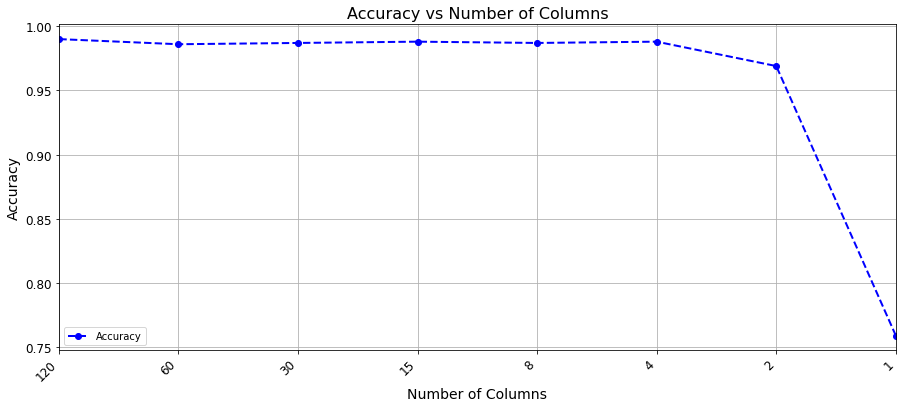

In [12]:
fig = plt.figure(figsize=(15, 6))

columns = columns[::-1]
accuracy_list = accuracy_list[::-1]

# evenly space the columns using np.linspace
new_columns = np.linspace(min(columns), max(columns), len(columns))

plt.plot(new_columns, accuracy_list, color='blue', linestyle='--', marker='o', linewidth=2, label='Accuracy')
plt.xlabel('Number of Columns', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs Number of Columns', fontsize=16)

# Reverse the order of the tick labels and set them at an angle
plt.xticks(new_columns, columns, rotation=45, ha='right', fontsize=12)
plt.gca().invert_xaxis()  # invert the x-axis to keep the tick labels in order

plt.yticks(fontsize=12)
plt.grid()
plt.legend(loc='lower left')

plt.xlim(max(columns), min(columns))

plt.show()


**Separate the 120 columns into the 3 channels and remove 1 column from the channels**

In [13]:
X_train_2 = X_train 
y_train_2 = y_train

X_test_2 = X_test
y_test_2 = y_test

#Separates 120 columns into 3 arrays of 40 colums and the removes one row from each array and displays its accuracy
accuracy_list = []
columns = []

all_data = {}


train_arr1, train_arr2, train_arr3 = np.split(X_train_2, 3, axis=1)
test_arr1, test_arr2, test_arr3 = np.split(X_test_2, 3, axis=1)

combined_arr_train = np.concatenate((train_arr1, train_arr2, train_arr3), axis=1)


while combined_arr_train.shape[1] > 3:
    
    rfc = RandomForestClassifier(n_estimators=250, max_depth=25, max_features='sqrt', class_weight= "balanced" , random_state=42)
    
    combined_arr_train = np.concatenate((train_arr1, train_arr2, train_arr3), axis=1)
    combined_arr_test = np.concatenate((test_arr1, test_arr2, test_arr3), axis=1)

    rfc.fit(combined_arr_train, y_train_2)

    y_pred = rfc.predict(combined_arr_test)
    accuracy = accuracy_score(y_test_2, y_pred)
    accuracy_list.append(accuracy)   

    columns.append(combined_arr_train.shape[1])
    print("Accuracy: " + str(accuracy) + " | Number of Columns: " + str(combined_arr_train.shape[1]))
    all_data[combined_arr_train.shape[1]] = [combined_arr_train, combined_arr_test]
 
    train_arr1 =np.delete(train_arr1, -1, axis=1)

    train_arr2 =np.delete(train_arr2, -1, axis=1)

    train_arr3 =np.delete(train_arr3, -1, axis=1)

    test_arr1 =np.delete(test_arr1, -1, axis=1)

    test_arr2 =np.delete(test_arr2, -1, axis=1)

    test_arr3 =np.delete(test_arr3, -1, axis=1)

Accuracy: 0.99 | Number of Columns: 120
Accuracy: 0.989 | Number of Columns: 117
Accuracy: 0.989 | Number of Columns: 114
Accuracy: 0.988 | Number of Columns: 111
Accuracy: 0.989 | Number of Columns: 108
Accuracy: 0.989 | Number of Columns: 105
Accuracy: 0.989 | Number of Columns: 102
Accuracy: 0.989 | Number of Columns: 99
Accuracy: 0.991 | Number of Columns: 96
Accuracy: 0.988 | Number of Columns: 93
Accuracy: 0.989 | Number of Columns: 90
Accuracy: 0.989 | Number of Columns: 87
Accuracy: 0.988 | Number of Columns: 84
Accuracy: 0.989 | Number of Columns: 81
Accuracy: 0.99 | Number of Columns: 78
Accuracy: 0.989 | Number of Columns: 75
Accuracy: 0.988 | Number of Columns: 72
Accuracy: 0.99 | Number of Columns: 69
Accuracy: 0.987 | Number of Columns: 66
Accuracy: 0.989 | Number of Columns: 63
Accuracy: 0.99 | Number of Columns: 60
Accuracy: 0.989 | Number of Columns: 57
Accuracy: 0.991 | Number of Columns: 54
Accuracy: 0.99 | Number of Columns: 51
Accuracy: 0.991 | Number of Columns: 4

In [14]:
# Lets get the max accuracy from that loop
max(accuracy_list)

0.991

In [15]:
# Lets see how many colums that is 
max_value = max(accuracy_list)
max_indexes = [i for i, value in enumerate(accuracy_list) if value == max_value]

for index in max_indexes:
    print(columns[index])

96
54
48


In [16]:
# Each numpy array had 16 column
48 / 3

16.0

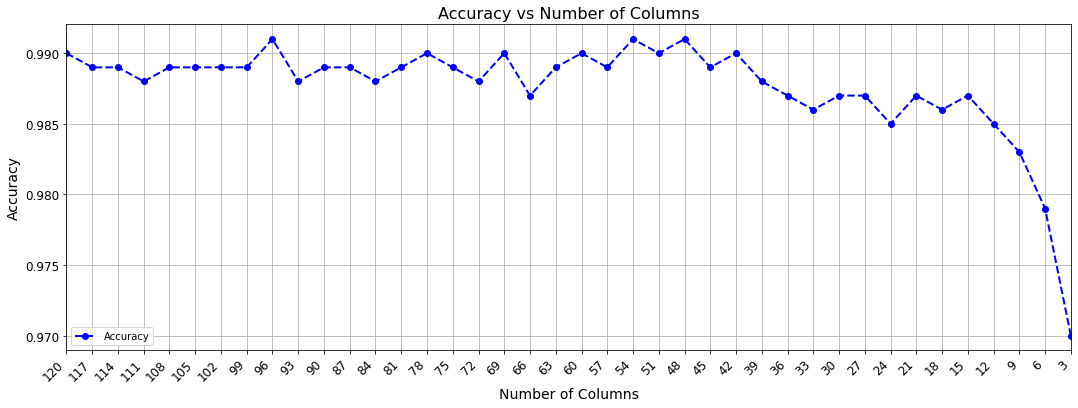

In [17]:
fig = plt.figure(figsize=(18, 6))

columns = columns[::-1]
accuracy_list = accuracy_list[::-1]

# evenly space the columns using np.linspace
new_columns = np.linspace(min(columns), max(columns), len(columns))

plt.plot(new_columns, accuracy_list, color='blue', linestyle='--', marker='o', linewidth=2, label='Accuracy')
plt.xlabel('Number of Columns', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs Number of Columns', fontsize=16)

# Reverse the order of the tick labels and set them at an angle
plt.xticks(new_columns, columns, rotation=45, ha='right', fontsize=12)
plt.gca().invert_xaxis()  # invert the x-axis to keep the tick labels in order

plt.yticks(fontsize=12)
plt.grid()
plt.legend(loc='lower left')

plt.xlim(max(columns), min(columns))

plt.show()


**Remove Last column**

In [18]:
X_train_3 = X_train 
y_train_3 = y_train

X_test_3 = X_test
y_test_3 = y_test

# Remove last column
accuracy_list = []
columns = []

all_data = {}

while X_train_3.shape[1] > 3:
    
    rfc = RandomForestClassifier(n_estimators=250, max_depth=25, max_features='sqrt', class_weight= "balanced" , random_state=42)
    rfc.fit(X_train_3, y_train_3)

    y_pred = rfc.predict(X_test_3)
    accuracy = accuracy_score(y_test_3, y_pred)
    accuracy_list.append(accuracy)   

    columns.append(X_train_3.shape[1])
    print("Accuracy: " + str(accuracy) + " | Number of Columns: " + str(X_train_3.shape[1]))
    all_data[X_train_3.shape[1]] = [X_train_3, X_test_3]

    X_train_3 = np.delete(X_train_3, -1, axis=1)

    X_test_3 = np.delete(X_test_3, -1, axis=1)
    

Accuracy: 0.99 | Number of Columns: 120
Accuracy: 0.99 | Number of Columns: 119
Accuracy: 0.99 | Number of Columns: 118
Accuracy: 0.989 | Number of Columns: 117
Accuracy: 0.989 | Number of Columns: 116
Accuracy: 0.989 | Number of Columns: 115
Accuracy: 0.989 | Number of Columns: 114
Accuracy: 0.988 | Number of Columns: 113
Accuracy: 0.989 | Number of Columns: 112
Accuracy: 0.988 | Number of Columns: 111
Accuracy: 0.989 | Number of Columns: 110
Accuracy: 0.989 | Number of Columns: 109
Accuracy: 0.989 | Number of Columns: 108
Accuracy: 0.99 | Number of Columns: 107
Accuracy: 0.988 | Number of Columns: 106
Accuracy: 0.99 | Number of Columns: 105
Accuracy: 0.989 | Number of Columns: 104
Accuracy: 0.989 | Number of Columns: 103
Accuracy: 0.989 | Number of Columns: 102
Accuracy: 0.989 | Number of Columns: 101
Accuracy: 0.99 | Number of Columns: 100
Accuracy: 0.991 | Number of Columns: 99
Accuracy: 0.99 | Number of Columns: 98
Accuracy: 0.991 | Number of Columns: 97
Accuracy: 0.991 | Number o

In [19]:
# Lets get the max accuracy from that loop
max(accuracy_list)

0.991

In [20]:
# All colums that are equal with the max
max_value = max(accuracy_list)
max_indexes = [i for i, value in enumerate(accuracy_list) if value == max_value]

for index in max_indexes:
    print(columns[index])

99
97
96
94
91
90
89
87
85


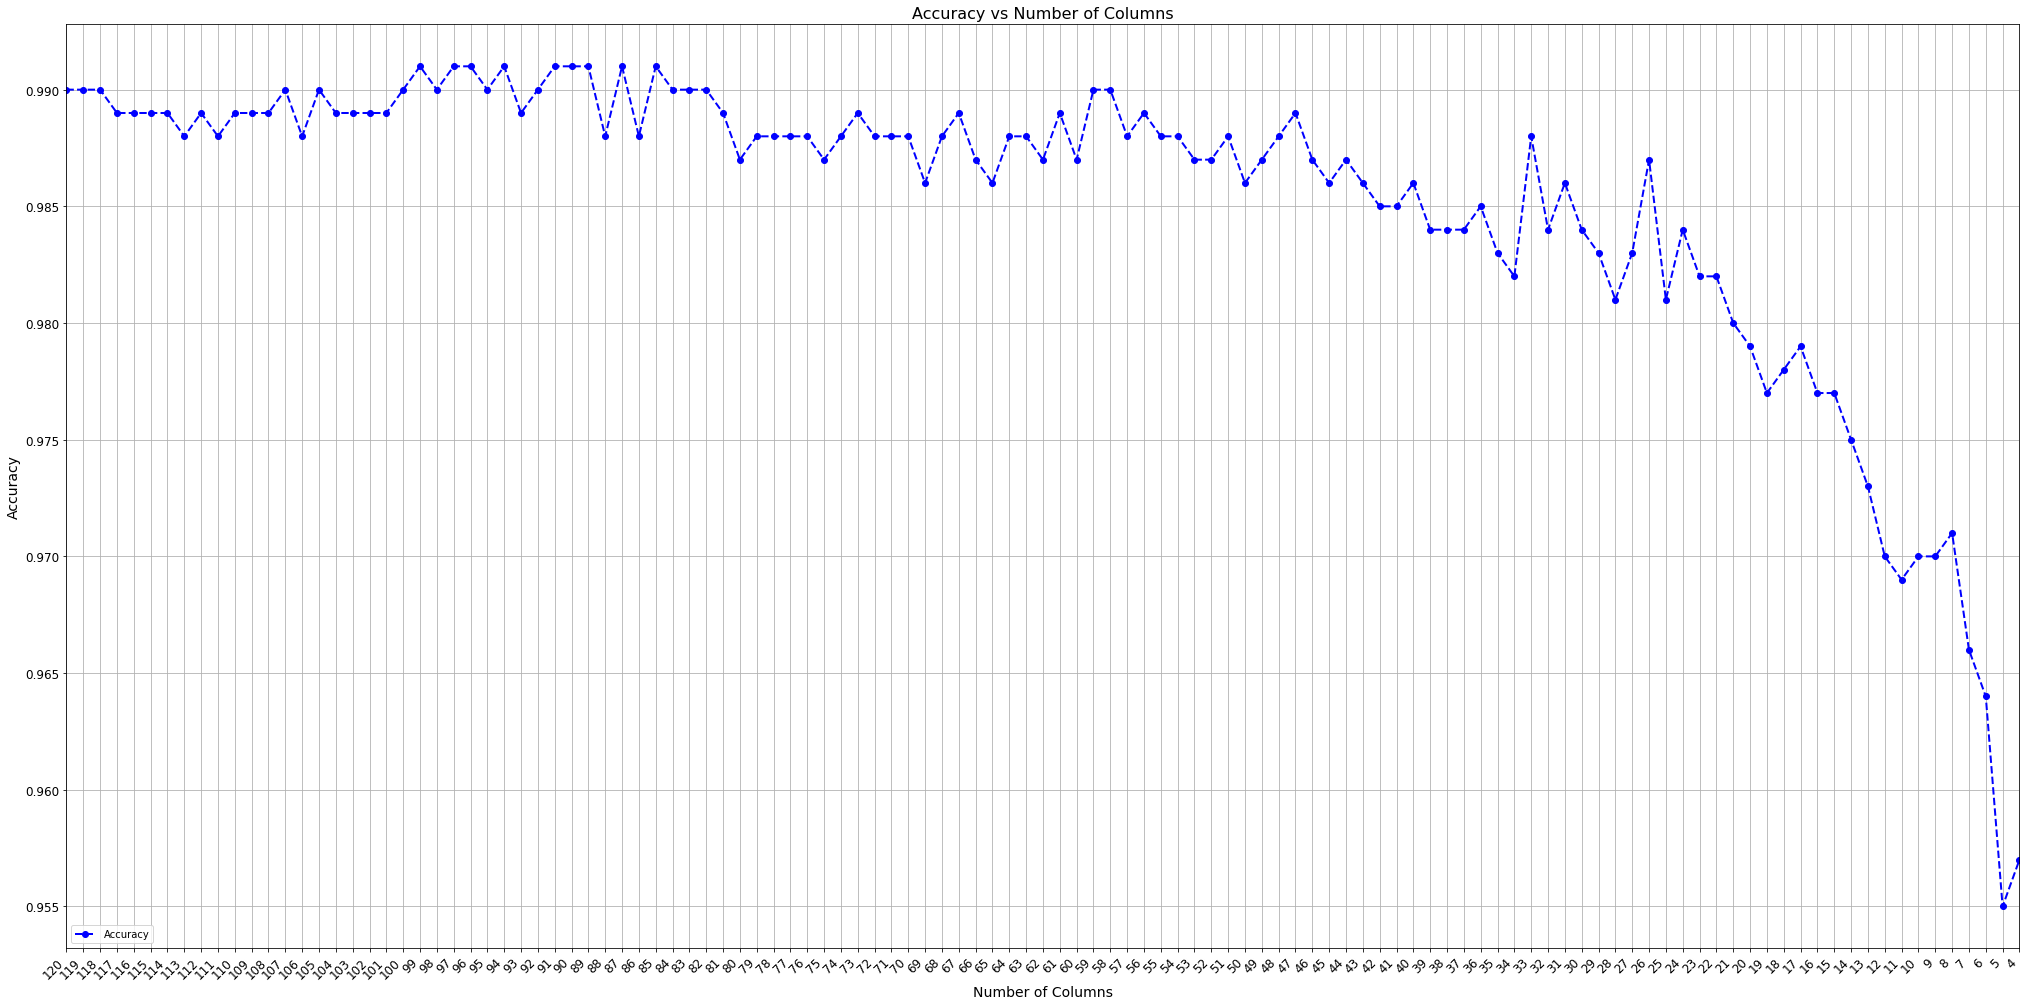

In [22]:
fig = plt.figure(figsize=(35, 17))

columns = columns[::-1]
accuracy_list = accuracy_list[::-1]

# evenly space the columns using np.linspace
new_columns = np.linspace(min(columns), max(columns), len(columns))

plt.plot(new_columns, accuracy_list, color='blue', linestyle='--', marker='o', linewidth=2, label='Accuracy')
plt.xlabel('Number of Columns', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs Number of Columns', fontsize=16)

# Reverse the order of the tick labels and set them at an angle
plt.xticks(new_columns, columns, rotation=45, ha='right', fontsize=12)
plt.gca().invert_xaxis()  # invert the x-axis to keep the tick labels in order

plt.yticks(fontsize=12)
plt.grid()
plt.legend(loc='lower left')

plt.xlim(min(columns), max(columns))

plt.show()